In [1]:
%matplotlib notebook
import numpy as np
import helpers
import pandas as pd

In [2]:
# load container for plotting
evoked = helpers.load_evoked_container()

# load 'posterior p-values'
pvals = pd.read_hdf(helpers.resultsdir + '/meg_hierarchical_advi.h5', 'pvals') 

Reading data/meg_final_data/evoked_hfreq10.0_sfreq100.0_window0.40-0.70_mag-ave.fif ...
    Read a total of 6 projection items:
        grad_ssp_upright2.fif : PCA-v1 (1 x 306)  idle
        grad_ssp_upright2.fif : PCA-v2 (1 x 306)  idle
        grad_ssp_upright2.fif : PCA-v3 (1 x 306)  idle
        mag_ssp_upright2.fif : PCA-v1 (1 x 306)  idle
        mag_ssp_upright2.fif : PCA-v2 (1 x 306)  idle
        mag_ssp_upright2.fif : PCA-v3 (1 x 306)  idle
    Found the data of interest:
        t =     400.00 ...     700.00 ms (Unknown)
        0 CTF compensation matrices available
        nave = 480 - aspect type = 100
No baseline correction applied


<IPython.core.display.Javascript object>


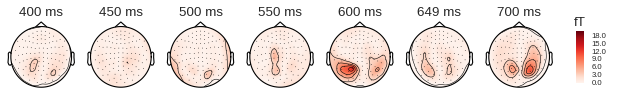

<IPython.core.display.Javascript object>


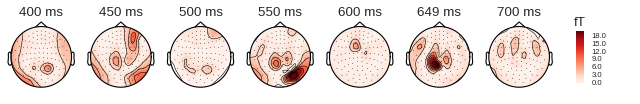

<IPython.core.display.Javascript object>


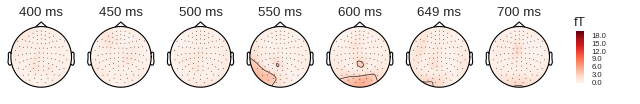

<IPython.core.display.Javascript object>


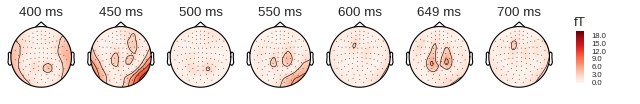

<IPython.core.display.Javascript object>


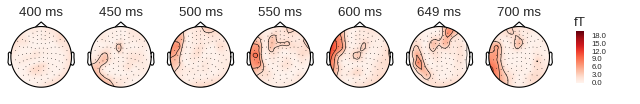

<IPython.core.display.Javascript object>


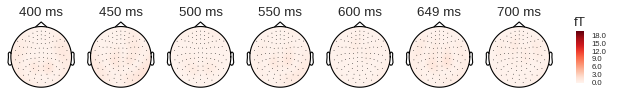

In [3]:
times = np.arange(0.4, 0.71, 0.05)
for reg in pvals.columns:
    evoked.data = -np.log10(pvals[reg].values.reshape(evoked.data.shape))
    evoked.comment = reg
    
    fig = evoked.plot_topomap(times, scale=1, vmin=0, vmax=20, cmap=('Reds', False))
    fig.set_label(reg)